Check Python version

In [1]:
!python --version

Python 3.9.18


Import libraries

In [2]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [3]:
# Through online GitHub
file_name = 'https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv'

In [4]:
train_df = pd.read_csv(file_name)

In [5]:
train_df.shape

(144, 2)

In [6]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [7]:
train_df.head()

ds    y
0  1949-01-01  112
1  1949-02-01  118
2  1949-03-01  132
3  1949-04-01  129
4  1949-05-01  121

In [8]:
train_df.tail()

ds    y
139  1960-08-01  606
140  1960-09-01  508
141  1960-10-01  461
142  1960-11-01  390
143  1960-12-01  432

Define the required time and target columns

In [9]:
time_col = train_df.columns[0]
target_col = train_df.columns[-1]
train_df[time_col] = train_df[time_col].astype(str)

Change target column to float

In [10]:
train_df[target_col] = train_df[target_col].astype(float)

In [11]:
train_df.head()

ds      y
0  1949-01-01  112.0
1  1949-02-01  118.0
2  1949-03-01  132.0
3  1949-04-01  129.0
4  1949-05-01  121.0

Plot graph

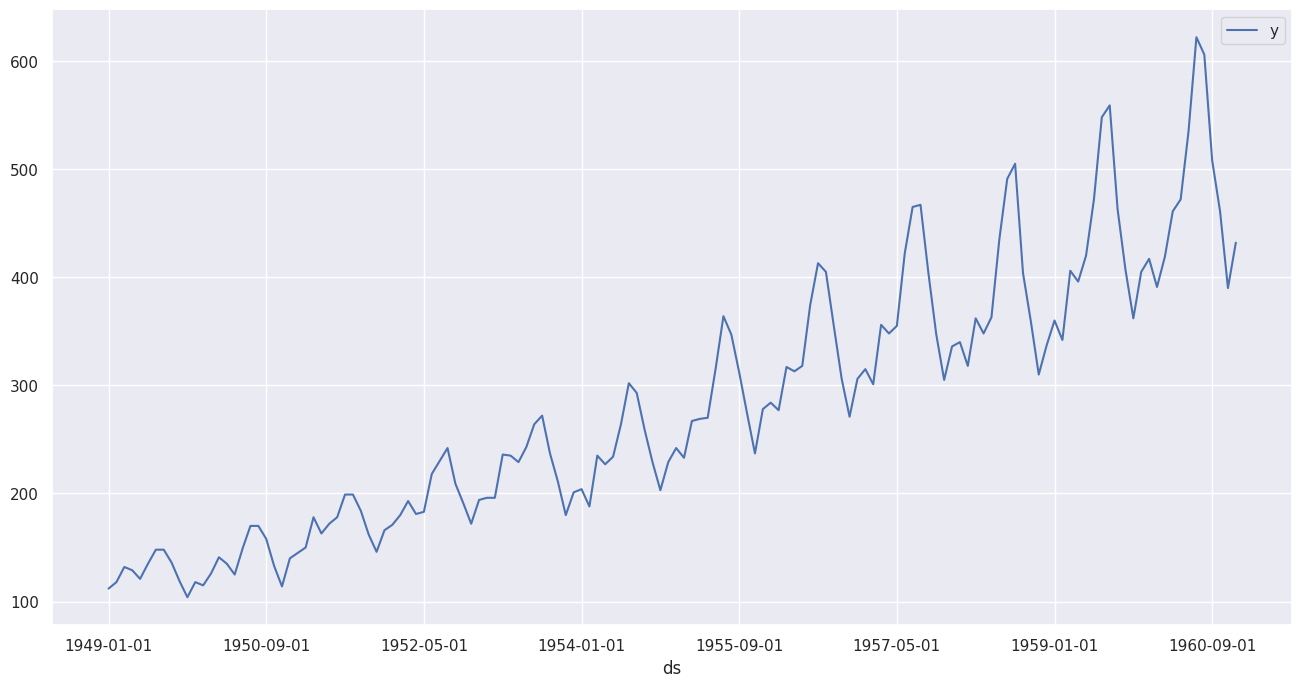

In [12]:
figsize = (16, 8)
train_df.set_index(time_col).plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [13]:
train_data = []

In [14]:
for value in train_df.values:
    train_data.append(list(value))

In [15]:
train_data[:10]

[['1949-01-01', 112.0],
 ['1949-02-01', 118.0],
 ['1949-03-01', 132.0],
 ['1949-04-01', 129.0],
 ['1949-05-01', 121.0],
 ['1949-06-01', 135.0],
 ['1949-07-01', 148.0],
 ['1949-08-01', 148.0],
 ['1949-09-01', 136.0],
 ['1949-10-01', 119.0]]

Define Model Request (optional)

In [16]:
# # Customized model request
# model_request = {
#     'type': 'meta_wa',
#     'scorers': ['mase', 'smape'],
#     'params': {
#         'preprocessors': [
#             # {'type': 'dartsimputer'},
#             # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
#             {'type': 'minmaxscaler'},
#         ],
#         'base_models': [
#             # {'type': 'darts_rnn',
#             #  'params': {
#             #      'model': 'LSTM',
#             #      'hidden_dim': 10,
#             #      'n_rnn_layers': 3
#             # }},
#             # {'type': 'darts_tcn',
#             #  'params': {
#             #      'output_chunk_length': 24,
#             #      'input_chunk_length': 48,                 
#             #      'n_epochs': 50,
#             # }},
#             #     {'type': 'darts_rnn',
#             #  'params': {
#             #      'model': 'LSTM',
#             #      'hidden_dim': 10,
#             #      'n_rnn_layers': 3
#             # }},
#             # {'type': 'darts_nlinear'},
#             # {'type': 'darts_dlinear'},
#             #  {'type': 'darts_blockrnn'},
#              {'type': 'darts_tsmixer'},
#              {'type': 'darts_tide'},
#         ],
#     },
# }

This is for JSON model_request

In [17]:
# file_path = 'model_request.json'
# # For writing the model request to a json file
# with open(file_path, 'r') as file:
#     model_request = json.load(file)

This is for YAML model_request

In [18]:
file_path = 'model_request.yaml'
# For reading the model request from a yaml file
with open(file_path, 'r') as file:
    model_request = yaml.safe_load(file)

print(model_request)

{'type': 'meta_wa', 'scorers': ['mase', 'smape'], 'params': {'preprocessors': [{'type': 'minmaxscaler'}], 'base_models': [{'type': 'darts_tsmixer'}, {'type': 'darts_tide'}]}}


Train API JSON Payload

In [19]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

Build URL

In [20]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [21]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [22]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [23]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: user 91.8 ms, sys: 40.9 ms, total: 133 ms
Wall time: 1min 13s


In [24]:
train_json_out = response.json()  # dict output
train_json_out

{'model': 'AgEBCALZMgAAABAASIsyACAAAABm2SIAQAAQAGAAIAAAAAIAgABlbGmTjG+Uc2MMYyltbW11ZXJjjIyTiIz//wCUYUODYmxsd5RvlAtkaHOUKHRzc21kTWV9bnRubmNfdHIxjGdylIxujDdlZXJ1jHlDKGiIaP8AAEO+ZtZ2+sB6mzYvdIDiLK2zhO16QXQCdilfWKJrb6WPrhQMAzqaKOBka+agQoSwmP/DpGP6fNZgq565b/X0bb1qutSrEcDjEPhuM+fSbI1R0eN5/me78MByFzkT/BxxniRv+4RI9+6wIrIht1nxvspd1JT8KliKc1i4ZejhJeJGDVk1ACH7xn/59iXYR5lfbX2abn3CIvOcMqBnDO8ZubjElhDimxopqlRevUcPFNUBkDIe4nD0HctfNTEXBTOr/LOK0EDvlF9R+Hv/PmmJdCJHeZTij2IdSu+9jcwj6tV7KJm8CpPOIqLhTl6PO2iHHhpzVxiwkbfB9C3YLnIejnw+VzDHUO0/KSBadb8x0Ss68/qaqbH70hMwujaIWr0pXmbUoaiQu/8fA8OL0iDj9di1jxyswY2yrHAJc2EAjG5zc3Jpc5RldHhyLmFhlIxzFGNpSWkpBVp0ci5nYW5yfWFkLi5ld22TdGQojC5yX3BEYxxjYXREQUpSlEv//24BaGgBAlJO/yhLdAD29vb29vb39/f39/f39/f39/f39/f39/f39/f39/f39/f4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+fn5+fn5+fn5+fn5+fn5+fn5+fn5+fn5+fn5+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vv7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/wFG19sc29ulAR1ZHV0X2eMZZSngYwuZHN3k2QoAJRoiIz//5RiUlWUTpROYnNulHJlc2GTKJRoXGiFKI4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [25]:
dates = [
    '1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01', '1961-05-01', '1961-06-01',
    '1961-07-01', '1961-08-01', '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
    '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01', '1962-05-01', '1962-06-01',
    '1962-07-01', '1962-08-01', '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
]

Model from Train API

In [26]:
model = train_json_out['model']

Forecast API JSON Payload

In [27]:
api_json = {
    'model': model,
    'data': dates
}

Build URL (same as train except for the endpoint)

In [28]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [29]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: user 53.1 ms, sys: 5.1 ms, total: 58.2 ms
Wall time: 2.81 s


In [30]:
forecast_json_out = response.json()  # dict output
forecast_json_out

{'data': [['1961-01-01', 439.1590821563315],
  ['1961-02-01', 441.20032775838985],
  ['1961-03-01', 463.94977000935535],
  ['1961-04-01', 482.3755844124524],
  ['1961-05-01', 523.9989546126162],
  ['1961-06-01', 583.897091645883],
  ['1961-07-01', 678.6644516255487],
  ['1961-08-01', 670.116399253251],
  ['1961-09-01', 590.7488036622805],
  ['1961-10-01', 511.31198300357244],
  ['1961-11-01', 463.2669101547603],
  ['1961-12-01', 473.38839282614794],
  ['1962-01-01', 486.0262236712735],
  ['1962-02-01', 497.29934137772744],
  ['1962-03-01', 508.79449370058643],
  ['1962-04-01', 524.8197935905506],
  ['1962-05-01', 579.8180415778631],
  ['1962-06-01', 620.014648814916],
  ['1962-07-01', 728.5960424038335],
  ['1962-08-01', 755.2724576800163],
  ['1962-09-01', 678.1059095815535],
  ['1962-10-01', 581.8226750670599],
  ['1962-11-01', 532.7895488998602],
  ['1962-12-01', 529.5922494235188]]}

Combine forecast dates and output

In [31]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col],
)

In [32]:
forecast_df.shape

(24, 2)

In [33]:
forecast_df.columns

Index(['ds', 'y'], dtype='object')

In [34]:
forecast_df.head()

ds           y
0  1961-01-01  439.159082
1  1961-02-01  441.200328
2  1961-03-01  463.949770
3  1961-04-01  482.375584
4  1961-05-01  523.998955

In [35]:
forecast_df.tail()

ds           y
19  1962-08-01  755.272458
20  1962-09-01  678.105910
21  1962-10-01  581.822675
22  1962-11-01  532.789549
23  1962-12-01  529.592249

Plot train and forecast side-by-side

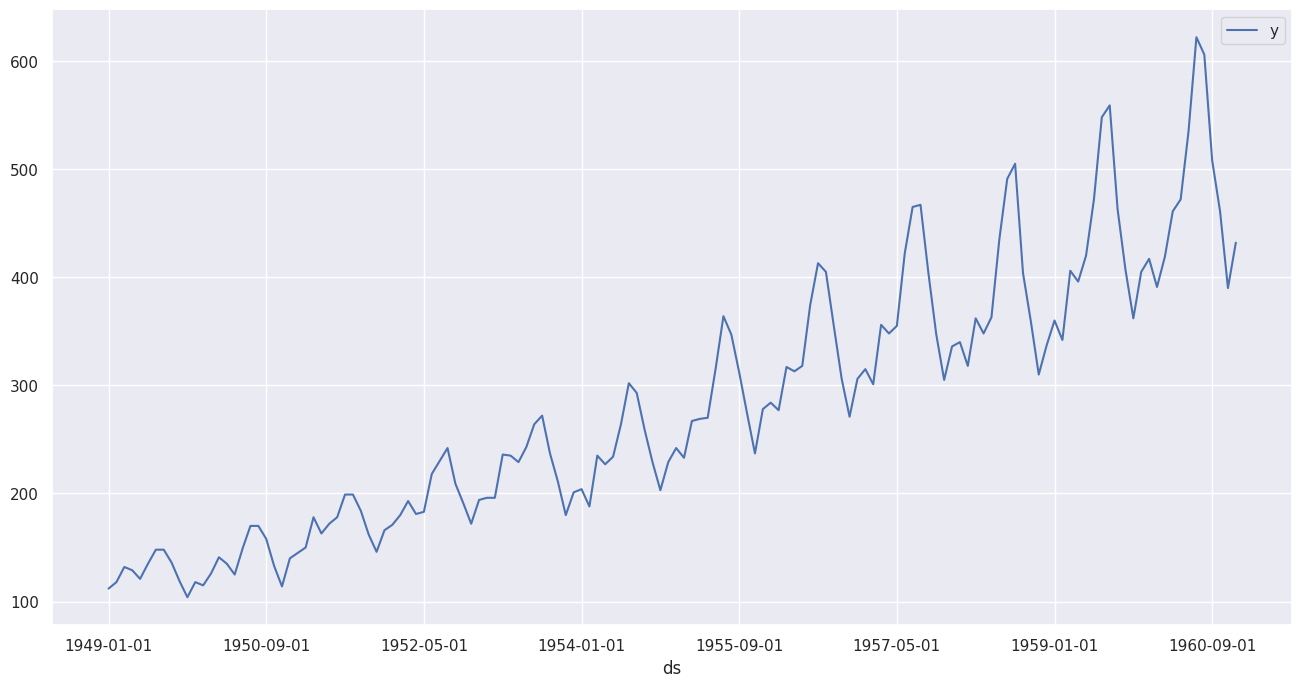

In [36]:
train_df['color'] = 'b'
train_df.set_index(time_col).plot(figsize=figsize, color=train_df['color']);

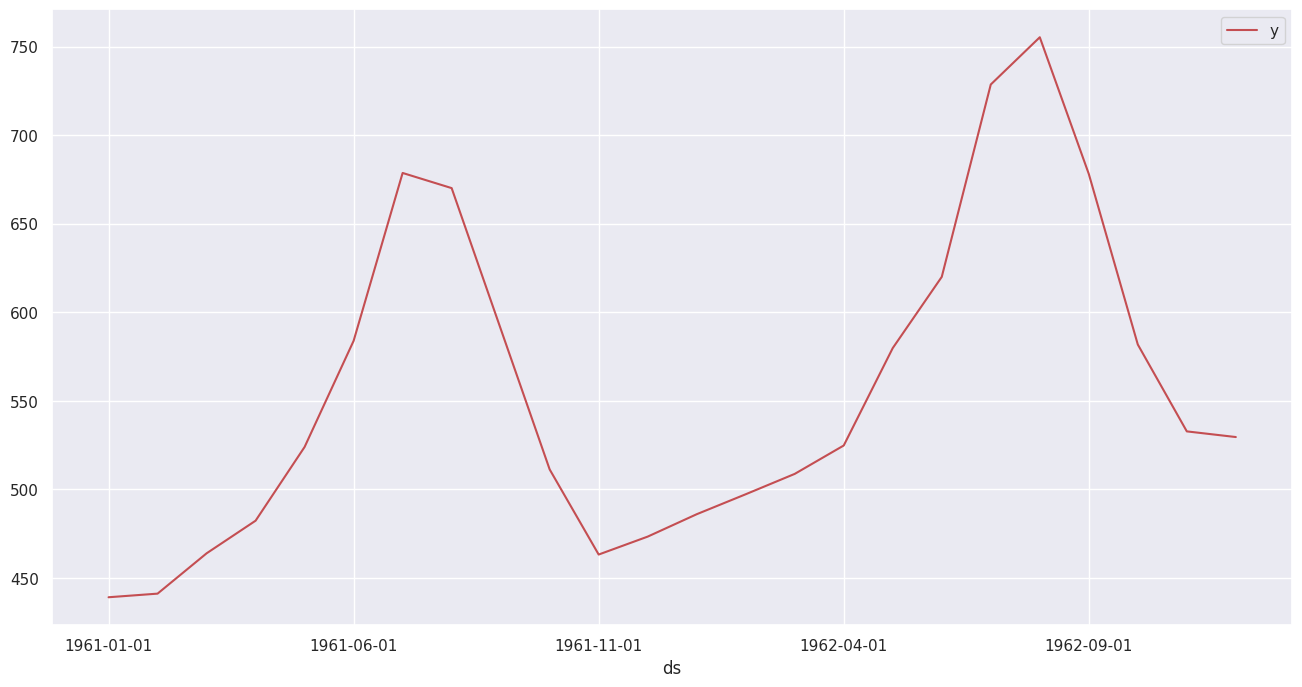

In [37]:
forecast_df['color'] = 'r'
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df['color']);

Combine train and forecast sets

In [38]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [39]:
df.shape

(168, 3)

In [40]:
df.head()

ds      y color
0  1949-01-01  112.0     b
1  1949-02-01  118.0     b
2  1949-03-01  132.0     b
3  1949-04-01  129.0     b
4  1949-05-01  121.0     b

In [41]:
df.tail()

ds           y color
163  1962-08-01  755.272458     r
164  1962-09-01  678.105910     r
165  1962-10-01  581.822675     r
166  1962-11-01  532.789549     r
167  1962-12-01  529.592249     r

Plot combined train and forecast sets with the vertical black line as the cut-off

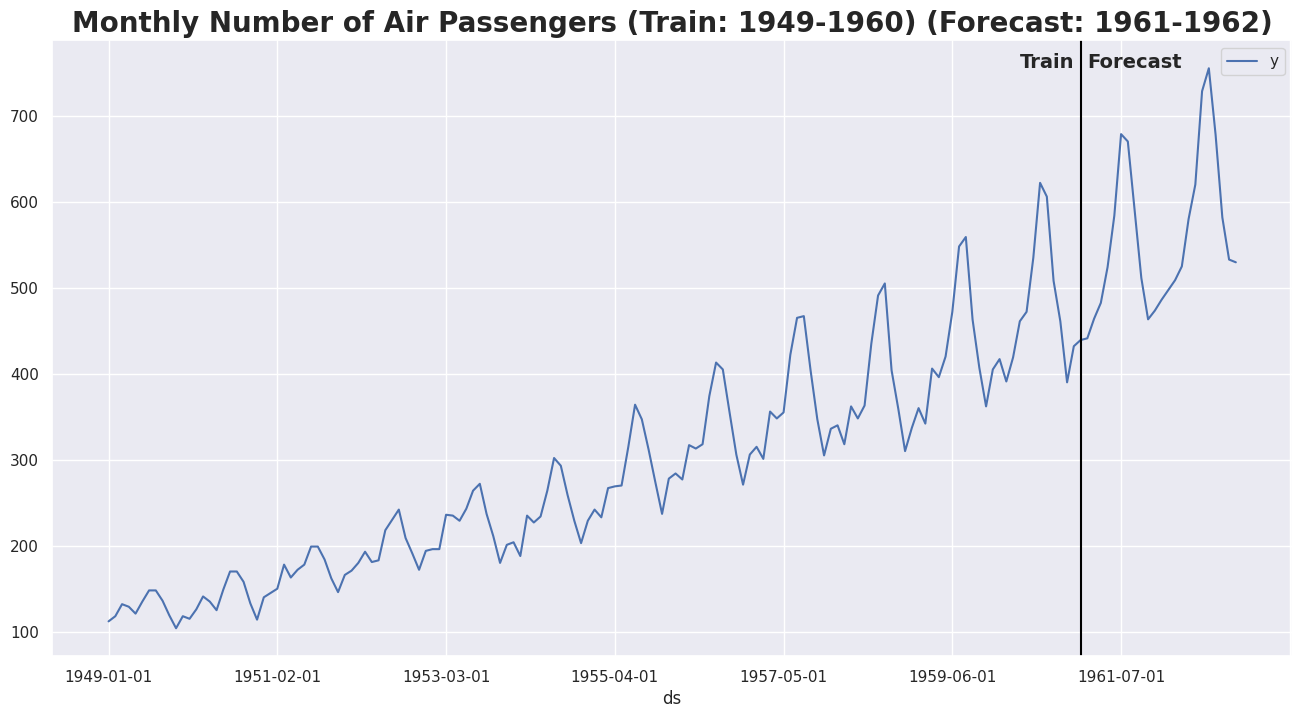

In [42]:
df.set_index(time_col).plot(figsize=figsize, color=df['color'])
plt.axvline(x=len(train_df), color='black', label='Train/Forecast set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Forecast', fontweight='bold', fontsize=14)
plt.title(label='Monthly Number of Air Passengers (Train: 1949-1960) (Forecast: 1961-1962)', fontweight='bold', fontsize=20)
plt.show();